# Plotting variables temperature and salinity for each reef site for the years 2012 and 2022 to have a 10 year comparison

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean as cmo
from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,5)

/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
libpodofo.so.0.9.8: 

## Loading in the data
dataset is a single file containing information on either temperature or salinity for either the year 2012 or 2022, as to havea 10 year comparison between variables.

In [2]:
url ='https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/daily/ocean_salt_2022_01.nc'

ds = xr.open_dataset(url)

In [3]:
ds

<xarray.Dataset>
Dimensions:         (xt_ocean: 3600, yt_ocean: 1500, st_ocean: 51, Time: 31,
                     nv: 2, st_edges_ocean: 52)
Coordinates:
  * xt_ocean        (xt_ocean) float64 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
  * yt_ocean        (yt_ocean) float64 -74.95 -74.85 -74.75 ... 74.85 74.95
  * st_ocean        (st_ocean) float64 2.5 7.5 12.5 ... 3.603e+03 4.509e+03
  * Time            (Time) datetime64[ns] 2022-01-01T12:00:00 ... 2022-01-31T...
  * nv              (nv) float64 1.0 2.0
  * st_edges_ocean  (st_edges_ocean) float64 0.0 5.0 10.0 ... 4.056e+03 5e+03
Data variables:
    average_T1      (Time) datetime64[ns] ...
    average_T2      (Time) datetime64[ns] ...
    average_DT      (Time) timedelta64[ns] ...
    Time_bounds     (Time, nv) timedelta64[ns] ...
    salt            (Time, st_ocean, yt_ocean, xt_ocean) float32 ...
Attributes:
    filename:                        TMP/ocean_ofam_2022_01_01.nc.0000
    NumFilesInSet:                   20
    grid_type:                       regular
    grid_tile:                       N/A
    history:                         Thu May 12 09:34:33 2022: ncrcat -4 --df...
    NCO:                             netCDF Operators version 5.0.5 (Homepage...
    title:                           BRAN2020
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    DODS_EXTRA.Unlimited_Dimension:  Time

## Adding each specific reef sites coordinates 
coordiantes are easily manipulated ependent on which reef is being analyzed

In [4]:
reef_lat = -16.93
reef_lon = 150.00

### Regional domain to garner a larger image with specific reef marked on map

In [5]:
# Domain
x0,x1 = 142,158
y0,y1 = -24, -8
# Subset an xarray.DataArray
my_salt = ds['salt'].sel(xt_ocean=slice(x0,x1), yt_ocean=slice(y0,y1), st_ocean=2.5)

## Plotting either temperature or salinity in the region with the specific reef marked
in this case I have plotted Coringa reefs practical salinity for January 2022. This can be easily manipulated to show my other variable - Temperature, as well as different reef sites for both years 2012 and 2022.

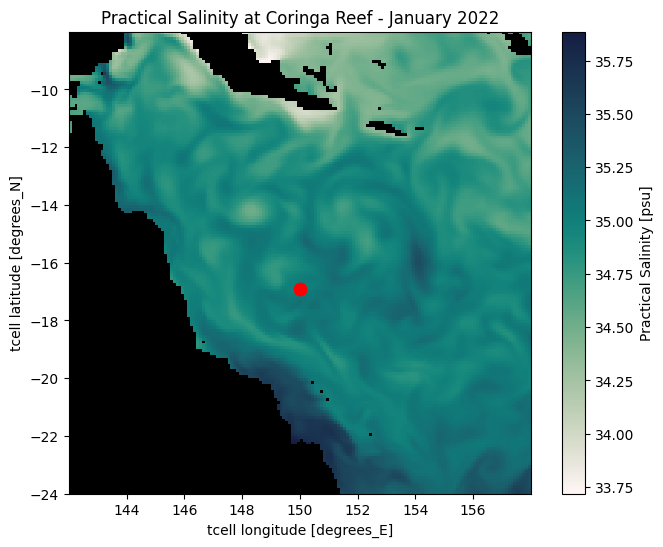

<Figure size 600x500 with 0 Axes>

In [6]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, facecolor='k')

my_salt.isel(Time=0).plot(cmap=cmo.cm.tempo) #, vmin=0, vmax=1.0, ax=ax)
plt.scatter(reef_lon,reef_lat,s=80,c='r')
ax.set_aspect('equal')
plt.title('Practical Salinity at Coringa Reef - January 2022')
fig.tight_layout

plt.show()
plt.savefig('coringareefsalt2022')

## Plotting the relationship between depth and either of my chosen variables
in this case, depth and salinity is plotted to show the relationship between these variables.

In [7]:
coringa_ds = ds.salt.sel(xt_ocean=reef_lon, yt_ocean=reef_lat, method='nearest')
coringa_ds

<xarray.DataArray 'salt' (Time: 31, st_ocean: 51)>
array([[35.016174, 35.014496, 35.012817, ...,       nan,       nan,       nan],
       [35.034637, 35.017853, 35.012817, ...,       nan,       nan,       nan],
       [35.02289 , 35.006104, 34.980927, ...,       nan,       nan,       nan],
       ...,
       [34.944   , 34.944   , 34.949036, ...,       nan,       nan,       nan],
       [34.90539 , 34.903713, 34.910427, ...,       nan,       nan,       nan],
       [34.902035, 34.902035, 34.903713, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    xt_ocean  float64 150.1
    yt_ocean  float64 -16.95
  * st_ocean  (st_ocean) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
  * Time      (Time) datetime64[ns] 2022-01-01T12:00:00 ... 2022-01-31T12:00:00
Attributes:
    long_name:      Practical Salinity
    units:          psu
    valid_range:    [-32767  32767]
    packing:        4
    cell_methods:   time: mean Time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_salinity
    _ChunkSizes:    [  1   1 300 300]

In [8]:
coringa_ds.st_ocean.values

array([2.50000000e+00, 7.50000000e+00, 1.25000000e+01, 1.75153904e+01,
       2.26670208e+01, 2.81693802e+01, 3.42180061e+01, 4.09549751e+01,
       4.84549751e+01, 5.67180061e+01, 6.56693802e+01, 7.51670227e+01,
       8.50153885e+01, 9.50000000e+01, 1.05000000e+02, 1.15000000e+02,
       1.25000000e+02, 1.35000000e+02, 1.45000000e+02, 1.55000000e+02,
       1.65000000e+02, 1.75000000e+02, 1.85000000e+02, 1.95000000e+02,
       2.05189896e+02, 2.17054489e+02, 2.33194321e+02, 2.55884232e+02,
       2.86608978e+02, 3.25884216e+02, 3.73194336e+02, 4.27054474e+02,
       4.85189911e+02, 5.45511108e+02, 6.10415649e+02, 6.85926758e+02,
       7.75926758e+02, 8.80415649e+02, 9.95511108e+02, 1.11531335e+03,
       1.23835388e+03, 1.36815747e+03, 1.50773389e+03, 1.65815747e+03,
       1.81835388e+03, 1.98531335e+03, 2.16518018e+03, 2.43110107e+03,
       2.89484180e+03, 3.60310107e+03, 4.50918018e+03])

In [9]:
shallow_coringa_salt = coringa_ds.isel(st_ocean=slice(0,6))

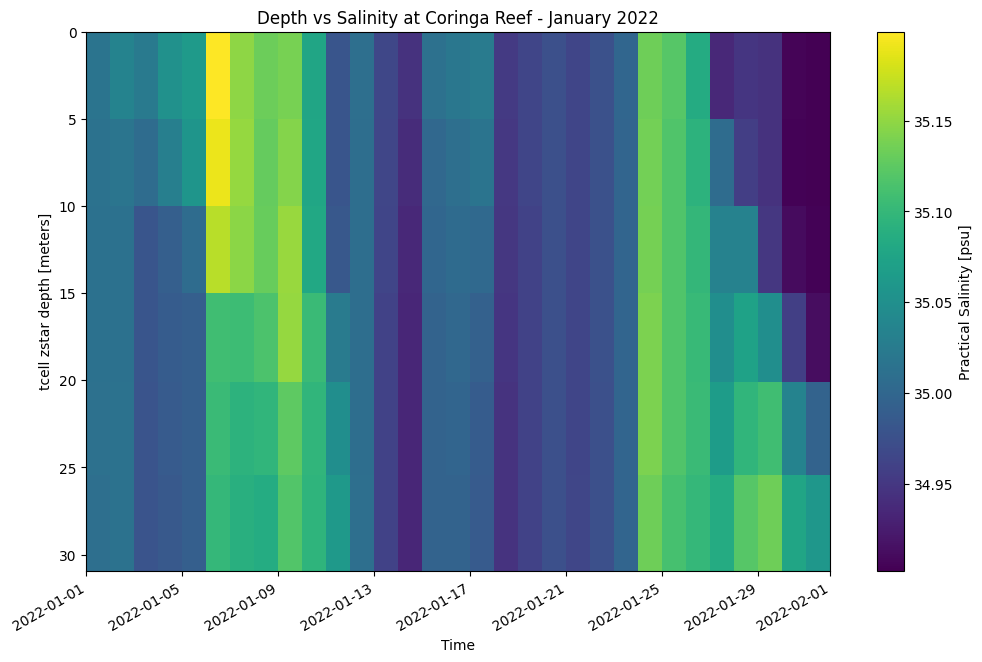

In [10]:
shallow_coringa_salt.transpose().plot(figsize=(12,7),yincrease=False)

plt.title('Depth vs Salinity at Coringa Reef - January 2022')
fig.tight_layout

plt.savefig('depthxsalt2022scoringa')

## Plotting the evolution of my chosen variable over the first month of each year at varying depths.
in this case, the practical salinity evolution over the month of January 2022 at Coringa reef is plotted, at both 2.5m depth and 34m depth.

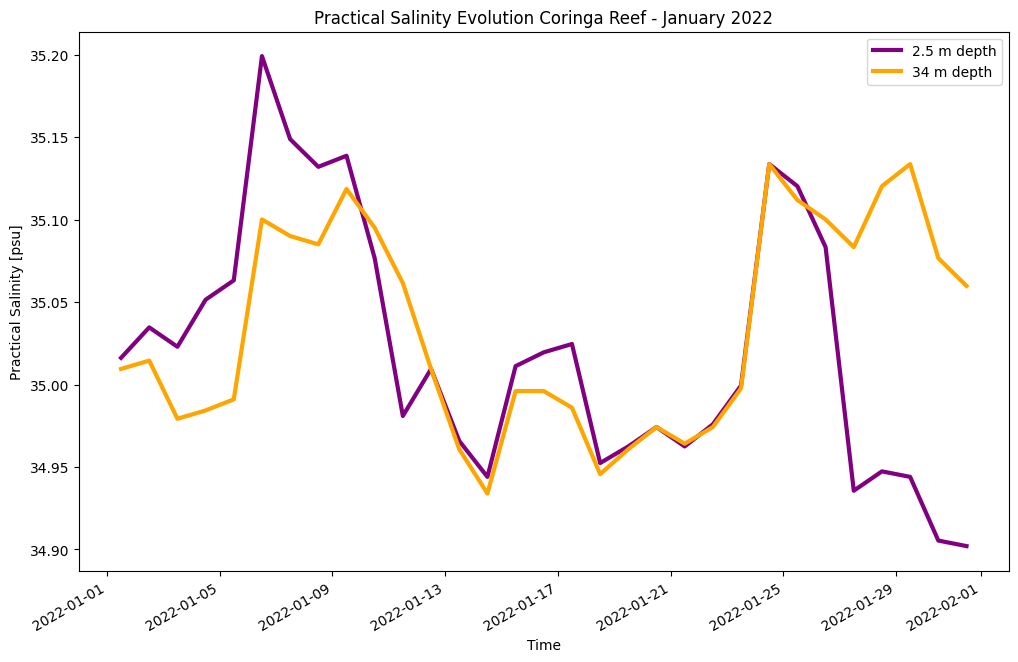

<Figure size 600x500 with 0 Axes>

In [11]:
shallow_coringa_salt.isel(st_ocean=0).plot(lw=3,c='purple',figsize=(12,7),label='2.5 m depth')
shallow_coringa_salt.isel(st_ocean=-1).plot(lw=3,c='orange',label='34 m depth')
plt.legend()
plt.title('Practical Salinity Evolution Coringa Reef - January 2022')
fig.tight_layout
plt.show()
plt.savefig('saltevocoringa2022')

## Plotting a 3 day average for each variable for the first month of each year at varying depths.
in  this case, I have plotted a 3 day average at Coring reef for the first month of 2022 at depths 2.5m and 34m. 

In [12]:
coringa_rolling = shallow_coringa_salt.rolling(Time=3, center=True).mean()

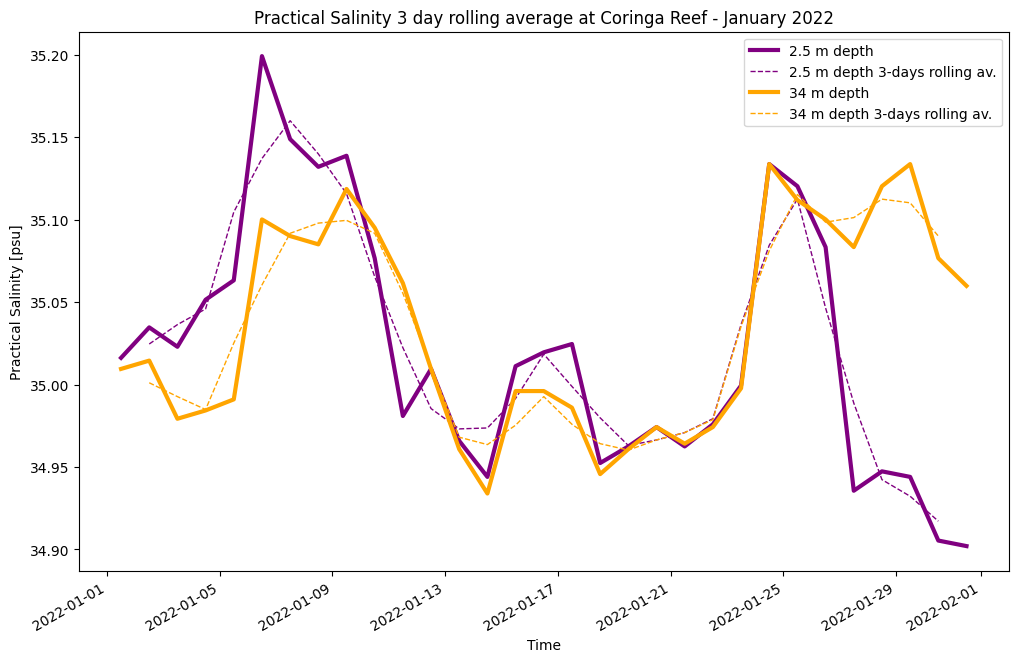

<Figure size 600x500 with 0 Axes>

In [13]:
shallow_coringa_salt.isel(st_ocean=0).plot(lw=3,c='purple',figsize=(12,7),label='2.5 m depth')
coringa_rolling.isel(st_ocean=0).plot(lw=1,ls='--',c='purple',label='2.5 m depth 3-days rolling av.')

shallow_coringa_salt.isel(st_ocean=-1).plot(lw=3,c='orange',label='34 m depth')
coringa_rolling.isel(st_ocean=-1).plot(lw=1,ls='--',c='orange',label='34 m depth 3-days rolling av.')
plt.legend()
plt.title('Practical Salinity 3 day rolling average at Coringa Reef - January 2022')
fig.tight_layout
plt.show()
plt.savefig('salt3daycoringa2022')